## Assignment 1
By Jing Wang, Alexander Moshchev


In [1]:

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore') # works
#warnings.filterwarnings(action='once') #does not work

## Random projections

Based on the program developed in the lecture (SparseRandomProjections), analyze 2 databases of your choice (but not exactly the same digits data as in the lecture) using random projections. Study the accuracy (or a score of your choice that makes most sense for your data) as a function of the number of dimensions / features that
survived the random projection.  
  
Try to avoid a zick-zack curve below or around the baseline accuracy curve as your final result for both datasets. At least for one dataset the score is expected to be a smooth-ish curve as a function of the kept number of
features. Provide a take-home statement and explain every step. You may find that data embedded in Euclidian spaces (such as digits) may be more appropriate than data for which Euclidian distances are not excellent distance measures

In [8]:
"""
trying with the datasets from scikit 
small datasets: https://scikit-learn.org/stable/datasets/toy_dataset.html
larger datasets: https://scikit-learn.org/stable/datasets/real_world.html
"""

#Let's get the basic visual about the dataset iris.
from sklearn import datasets

iris = datasets.load_iris() #size 150*4 class 3
wine = datasets.load_wine() #size 178*12 class 3
Forest = datasets.fetch_covtype() #size 581012*54 class 7

#reduce the size of Forest in 10000*54
forest = Forest
forest.data = Forest.data[:10000]
forest.target = Forest.target[:10000]
dataset = forest
from sklearn.model_selection import train_test_split
split = train_test_split(dataset.data, dataset.target, test_size = 0.3,
    random_state = 11)
(trainData, testData, trainTarget, testTarget) = split

## the following part is just reply the SparseRandomProjections

In [9]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
print ("Professors Johnson and Lindenstrauss say: k >=", johnson_lindenstrauss_min_dim(10000,eps=0.1))

Professors Johnson and Lindenstrauss say: k >= 7894


In [16]:
from sklearn import metrics
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(trainData, trainTarget)
baseline = metrics.accuracy_score(model.predict(testData), testTarget)
accuracies = []
accuracies2 = []
dims = np.int32(np.linspace(2, 70, 20))

In [17]:
from sklearn.random_projection import SparseRandomProjection
# Loop over the projection sizes, k
for dim in dims:
    
    # average over realizations
    #sum = 0
    #for i in range(1):
        # Create random projection
        sp = SparseRandomProjection(n_components = dim)
        X = sp.fit_transform(trainData)
 
        # Train classifier of your choice on the sparse random projection
        model = LinearSVC()
        model.fit(X, trainTarget)
 
        # Evaluate model and update accuracies
        test = sp.transform(testData)
        accuracies.append(metrics.accuracy_score(model.predict(test), testTarget))

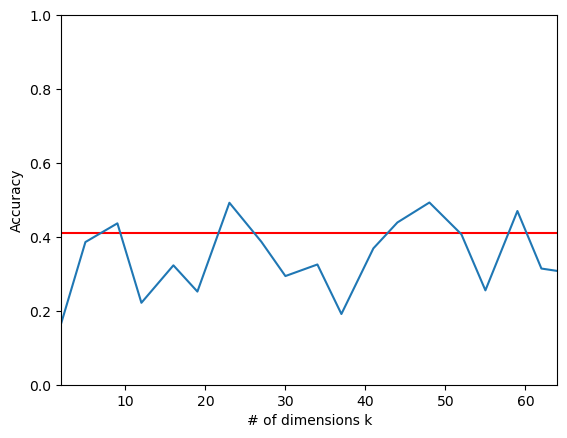

In [18]:
# Create figure
plt.figure()
plt.xlabel("# of dimensions k")
plt.ylabel("Accuracy")
plt.xlim([2, 64])
plt.ylim([0, 1])
 
# Plot baseline and random projection accuracies
plt.plot(dims, [baseline] * len(accuracies), color = "r")
plt.plot(dims, accuracies)

plt.show()